![](https://media.giphy.com/media/dVuyBgq2z5gVBkFtDc/giphy.gif)

Coronaviruses are a large family of viruses which may cause illness in animals or humans. In humans, several coronaviruses are known to cause respiratory infections ranging from the common cold to more severe diseases such as Middle East Respiratory Syndrome (MERS) and Severe Acute Respiratory Syndrome (SARS). The most recently discovered coronavirus causes coronavirus disease COVID-19.COVID-19 is the infectious disease caused by the most recently discovered coronavirus. This new virus and disease were unknown before the outbreak began in Wuhan, China, in December 2019.

In [36]:
import pandas as pd
import plotly
import plotly.graph_objects as go
import plotly.express as px
import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot
import folium
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
style.use('ggplot')
%matplotlib inline
from plotly.subplots import make_subplots
from IPython.display import display
# pd.reset_option('all')
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_rows', 50)

In [37]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [38]:
india_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/05-07-2021.csv')
india_df.drop(['FIPS', 'Admin2'], axis=1, inplace=True)
india_df.dropna(inplace=True)
india_df.loc[india_df['Province_State'] == 'Dadra and Nagar Haveli and Daman and Diu', 'Province_State'] = 'Daman and Diu'
india_df = india_df[india_df['Country_Region']=='India']
india_df.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
249,Andaman and Nicobar Islands,India,2021-05-08 04:21:04,11.23,92.97,6311,72,"6,030.00",209.00,"Andaman and Nicobar Islands, India","1,513.30",1.14
250,Andhra Pradesh,India,2021-05-08 04:21:04,15.91,79.74,1245374,8519,"1,050,160.00","186,695.00","Andhra Pradesh, India","2,310.38",0.68
251,Arunachal Pradesh,India,2021-05-08 04:21:04,27.77,96.38,19802,60,"17,849.00","1,893.00","Arunachal Pradesh, India","1,260.91",0.30
252,Assam,India,2021-05-08 04:21:04,26.36,92.83,283313,1578,"246,242.00","35,493.00","Assam, India",795.67,0.56
253,Bihar,India,2021-05-08 04:21:04,25.68,85.60,567269,3139,"449,063.00","115,067.00","Bihar, India",454.54,0.55


In [43]:
india_df[['Recovered','Confirmed','Deaths','Active']] = india_df[['Recovered','Confirmed','Deaths','Active']].astype(np.int64)

In [44]:
india_df.dtypes

Province_State          object
Country_Region          object
Last_Update             object
Lat                    float64
Long_                  float64
Confirmed                int64
Deaths                   int64
Recovered                int64
Active                   int64
Combined_Key            object
Incident_Rate          float64
Case_Fatality_Ratio    float64
dtype: object

In [45]:
india_df.shape

(36, 12)

In [46]:
india_df.isnull().sum()

Province_State         0
Country_Region         0
Last_Update            0
Lat                    0
Long_                  0
Confirmed              0
Deaths                 0
Recovered              0
Active                 0
Combined_Key           0
Incident_Rate          0
Case_Fatality_Ratio    0
dtype: int64

In [67]:
Total_Active_Cases=india_df.groupby('Province_State')['Confirmed','Active','Recovered','Deaths'].sum().sort_values(by='Confirmed',ascending=False)
Total_Active_Cases.style.background_gradient(cmap='Blues')

C:\Users\Sam Naresh\Anaconda3\envs\pyenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Confirmed,Active,Recovered,Deaths
Province_State,,,,
Maharashtra,4996758,657019,4265326,74413
Karnataka,1838885,536661,1284420,17804
Kerala,1824856,402997,1416177,5682
Uttar Pradesh,1453679,254118,1184688,14873
Tamil Nadu,1323965,135355,1173439,15171
Delhi,1292867,91035,1183093,18739
Andhra Pradesh,1245374,186695,1050160,8519
West Bengal,954282,124098,818108,12076
Chhattisgarh,830117,131041,688918,10158


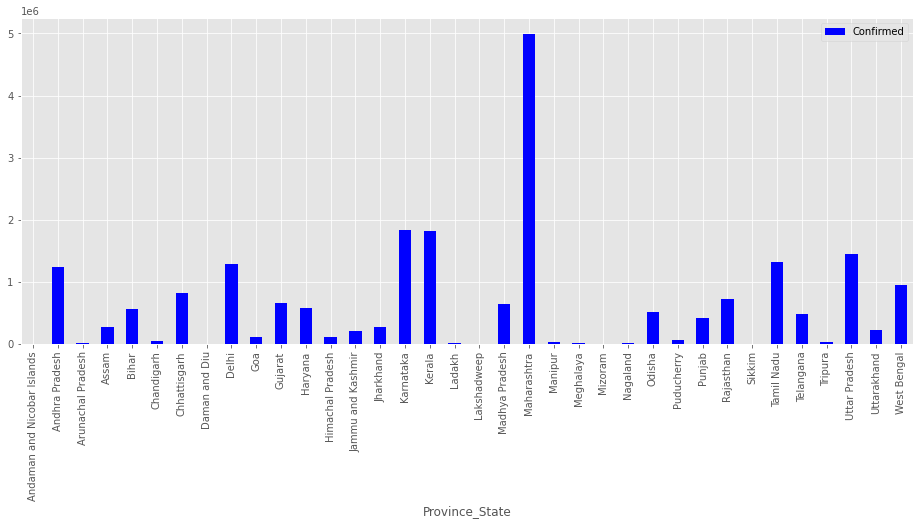

In [68]:
india_df.plot(kind='bar',x='Province_State',y='Confirmed', figsize=(16,6), color = 'b')
plt.show()

In [69]:
india_df.iplot(kind='bar',x='Province_State',y='Confirmed', colors = 'Blue')

<BarContainer object of 36 artists>

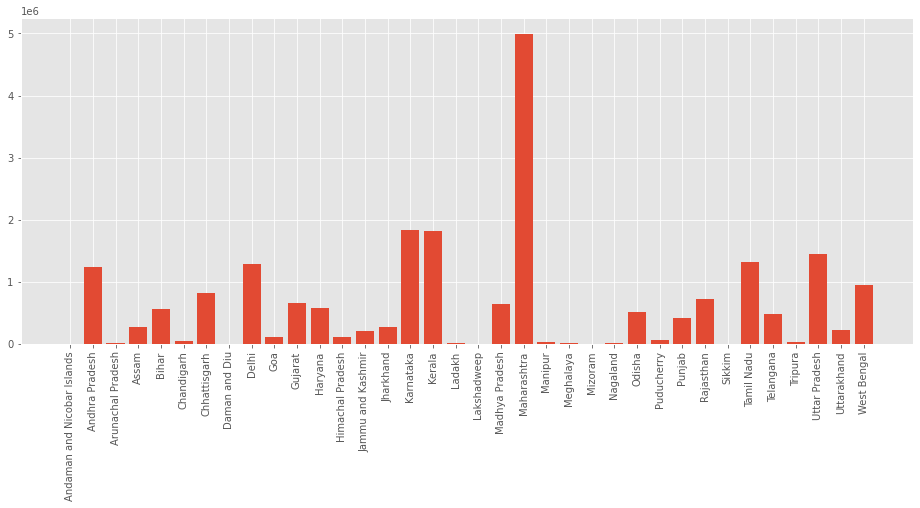

In [70]:
#Matplotlib vis
plt.figure(figsize=(16,6))
plt.xticks(rotation=90)
plt.bar(india_df['Province_State'],india_df['Confirmed'])

In [71]:
px.bar(india_df,x='Province_State',y='Confirmed')

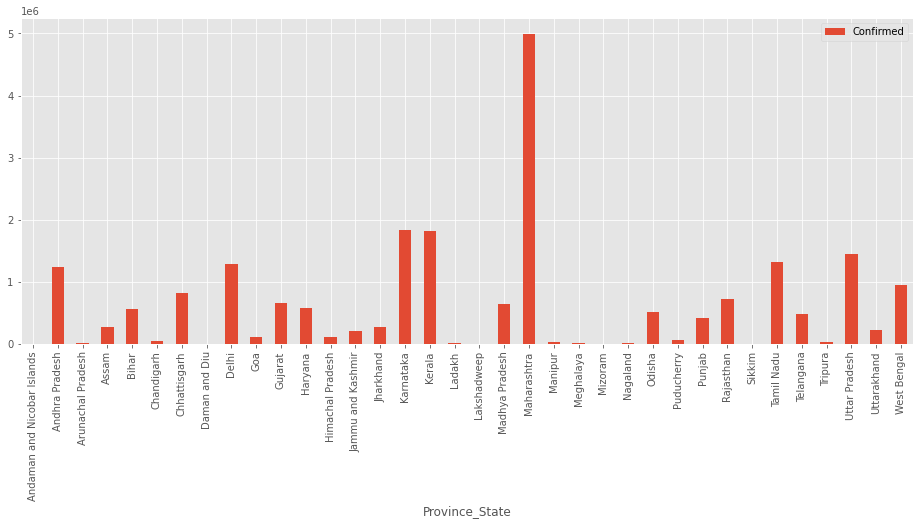

In [72]:
india_df.plot(kind='bar',x='Province_State',y='Confirmed',figsize=(16,6))

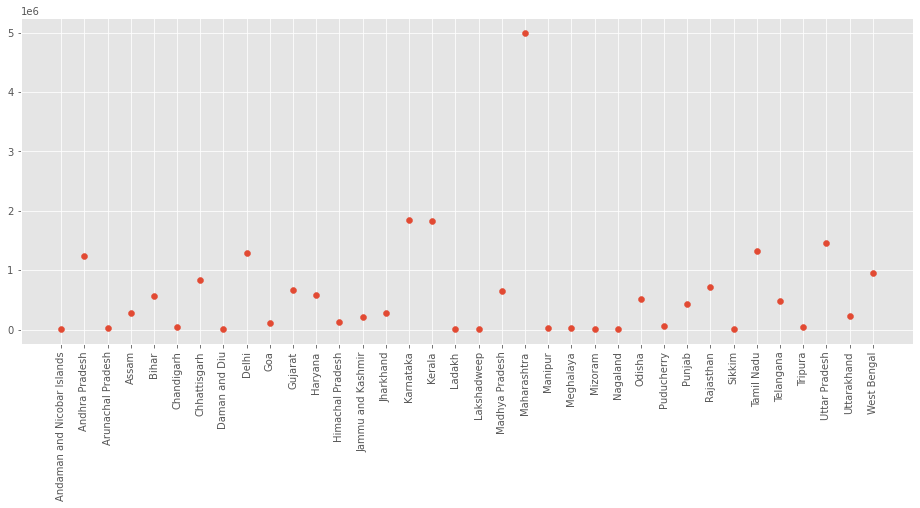

In [73]:
plt.figure(figsize=(16,6))
plt.xticks(rotation=90)
plt.scatter(india_df['Province_State'],india_df['Confirmed'])

In [74]:
india_df.iplot(kind='scatter',x='Province_State',y='Confirmed',mode='markers+lines',title='Corona',xTitle='Name of State / UT',yTitle='Total Cases',colors='red',size=15)

In [75]:
px.scatter(india_df,x='Province_State',y='Confirmed')

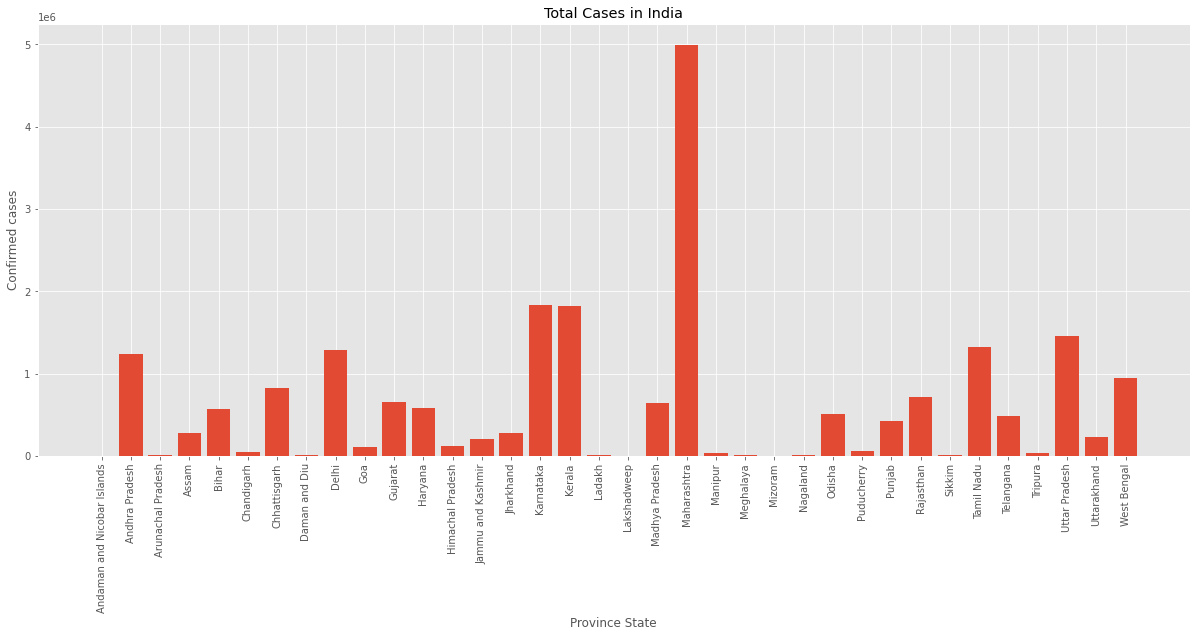

In [76]:
fig=plt.figure(figsize=(16,6))
axes=fig.add_axes([0,0,1,1])
axes.bar(india_df['Province_State'],india_df['Confirmed'])
axes.set_title("Total Cases in India")
axes.set_xlabel("Province State")
axes.set_ylabel("Confirmed cases")
plt.xticks(rotation=90)
plt.show()

In [77]:
fig=go.Figure()
fig.add_trace(go.Bar(x=india_df['Province_State'],y=india_df['Confirmed']))
fig.update_layout(title='Total Cases in India',xaxis=dict(title='Province State'),yaxis=dict(title='Confirmed cases'))

In [78]:
total_cases_map=folium.Map(location=[20,80],zoom_start=4,tiles='OpenStreetMap')

for lat,long,value, name in zip(india_df['Lat'],india_df['Long_'],india_df['Confirmed'],india_df['Province_State']):
    folium.CircleMarker([lat,long],radius=value*0.00001,popup=('<strong>State Name</strong>: '+str(name).capitalize()+'<br>''<strong>Total Cases in ' +str(name).capitalize()+'</strong>:' + str(value)+ '<br>'),color='blue',fill_color='blue',fill_opacity=0.3).add_to(total_cases_map)
    

In [79]:
display(total_cases_map)

In [80]:
total_death_map=folium.Map(location=[20,80],zoom_start=4,tiles='OpenStreetMap')

for lat,long,value, name in zip(india_df['Lat'],india_df['Long_'],india_df['Deaths'],india_df['Province_State']):
    folium.CircleMarker([lat,long],radius=value*0.0005,popup=('<strong>State Name</strong>: '+str(name).capitalize()+'<br>''<strong>Total Deaths in ' +str(name).capitalize()+'</strong>:' + str(value)+ '<br>'),color='red',fill_color='red',fill_opacity=0.3).add_to(total_death_map)

In [81]:
display(total_death_map)

In [82]:
total_cured_map=folium.Map(location=[20,80],zoom_start=4,tiles='OpenStreetMap')

for lat,long,value, name in zip(india_df['Lat'],india_df['Long_'],india_df['Recovered'],india_df['Province_State']):
    folium.CircleMarker([lat,long],radius=value*0.00001,popup=('<strong>State Name</strong>: '+str(name).capitalize()+'<br>''<strong>Total Recovered Cases in ' +str(name).capitalize()+'</strong>:' + str(value)+ '<br>'),color='green',fill_color='green',fill_opacity=0.3).add_to(total_cured_map)

In [83]:
display(total_cured_map)

In [102]:
total_active_map=folium.Map(location=[20,80],zoom_start=4,tiles='OpenStreetMap')

for lat,long,value, name in zip(india_df['Lat'],india_df['Long_'],india_df['Active'],india_df['Province_State']):
    folium.CircleMarker([lat,long],radius=value*0.00009,popup=('<strong>State Name</strong>: '+str(name).capitalize()+'<br>''<strong>Total Active Cases in ' +str(name).capitalize()+'</strong>:' + str(value)+ '<br>'),color='blue',fill_color='blue',fill_opacity=0.3).add_to(total_active_map)

In [103]:
display(total_active_map)